# Zomato Python Project



### Step 1 - Importing the python Libraries

In [ ]:
pandas is used for data manuplation and analysis
numpy is used for numerical operations
matplotlib.pyplot  and seaborn are used for the visualisation.
                                       


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2 - Create a data frame 

In [5]:
dataframe=pd.read_csv("Zomato data .csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [6]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### Convert the  type of rate column

In [9]:
def handleRate(value):
  value = str(value).split("/")
  value = value[0]
  return float(value)

dataframe["rate"]=dataframe["rate"].apply(handleRate)
print(dataframe.head())
    



                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
# to check the null value 

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Type of Resturant 

C:\Users\virat\AppData\Local\Temp\ipykernel_11340\1607315999.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataframe["listed_in(type)"],palette=custom_colors)


Text(0.5, 0, 'Type of Resturant')

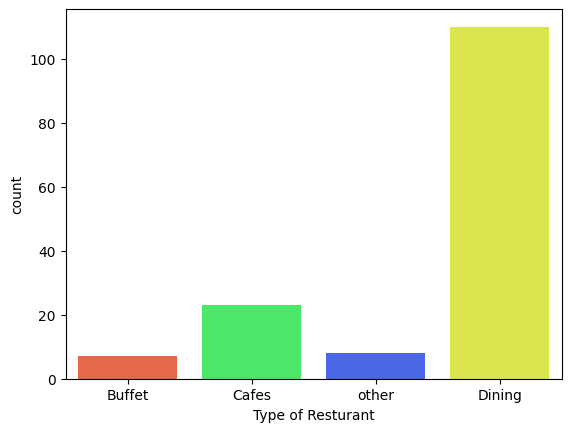

In [62]:
custom_colors = ['#FF5733', '#33FF57', '#3357FF', '#F0FF33']
sns.countplot(x=dataframe["listed_in(type)"],palette=custom_colors,hue = True)
plt.xlabel("Type of Resturant")


### Conclusion - majority of the resturant falls in dinning Category

Text(0, 0.5, 'Votes')

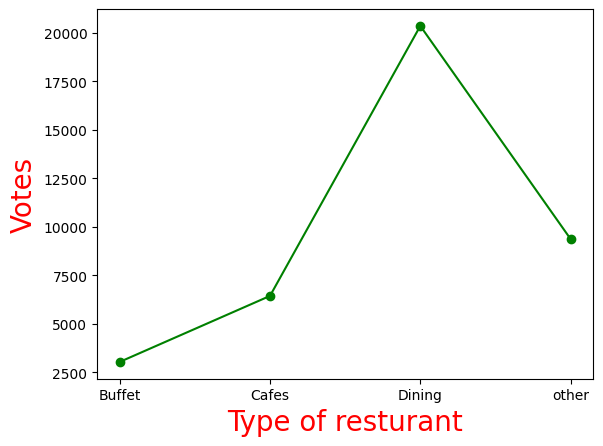

In [24]:
grouped_data = dataframe.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"votes":grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of resturant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)


## Conclusion - Dinning resturants has recieved maximum votes

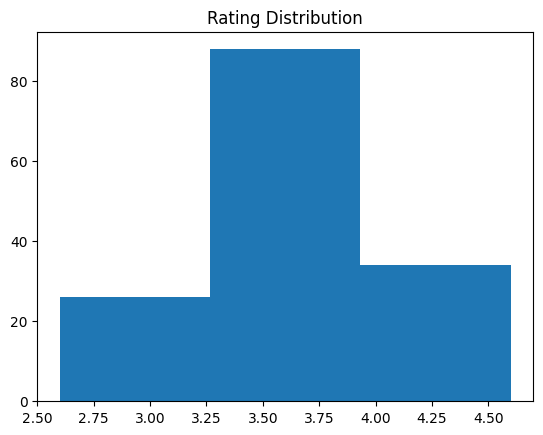

In [28]:
plt.hist(dataframe["rate"],bins=3)
plt.title("Rating Distribution")
plt.show()

### Average  spending on order by 2 people

C:\Users\virat\AppData\Local\Temp\ipykernel_11340\1251802754.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=couple_data, palette="coolwarm")


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

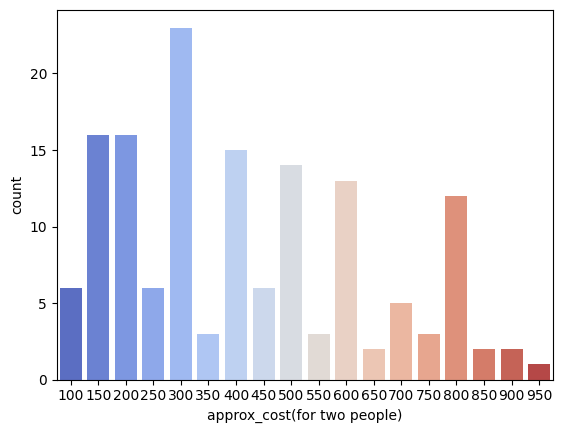

In [57]:
couple_data=dataframe["approx_cost(for two people)"]
color=["red","blue"]
sns.countplot(x=couple_data, palette="coolwarm")

## conclusion - most of the people spent 300 on order

 ### Which mode (online or offline ) recieved maximum rating ?

<Axes: xlabel='online_order', ylabel='rate'>

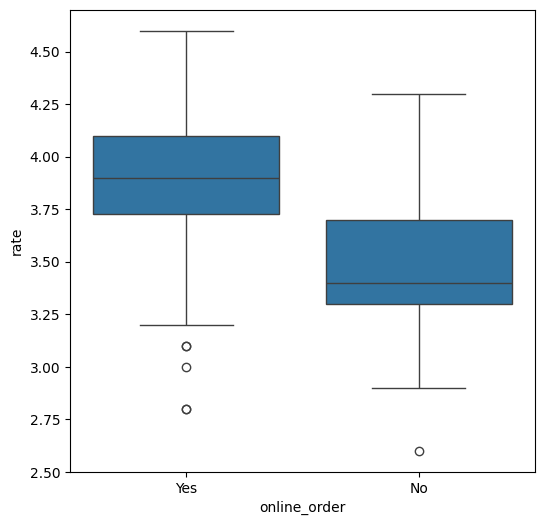

In [41]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data =dataframe)

## Conclusion - Online order recieved higher rating 

### which type of restaurant recieved more offline orders ?

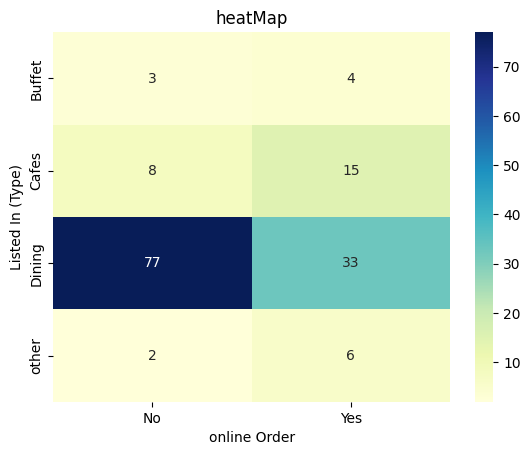

In [44]:
pivot_table =dataframe.pivot_table(index="listed_in(type)", columns="online_order", aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt="d")
plt.title("heatMap")
plt.xlabel("online Order")
plt.ylabel("Listed In (Type)")
plt.show()

### Conclusion -: dinning restaurants recieved most offline orders and cafe recieved more online orders .This suggest client prefer tp place order in person at  dinning restaurants but prefer online ordering at cafes